In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from operator import add
#import seaborn as sns

In [2]:
pool=np.loadtxt("./pool_data.csv", delimiter=",",skiprows=0, dtype=np.float32)
train,test=data_split_size(pool,9000)
np.savetxt("./train_9000.txt", train ,delimiter=" ")
np.savetxt("./test_9000.txt", train ,delimiter=" ")

OSError: ./pool_data.csv not found.

In [3]:
def data_split_size(data,size):
      #on a given dataset return the splitted data=> train_data(based on size),validate_data(leftover)
      a_list=np.arange(data.shape[0])
      np.random.shuffle(a_list)
      alist=a_list[0:size]
      train_data=data[alist]
      d=np.arange(data.shape[0])
      leftover=np.delete(d,alist)
      validate_data=data[leftover]
      return train_data,validate_data

def calc_residual(truth,pred):
    delz= np.subtract(truth,pred)
    residual=np.divide(np.abs(delz),np.abs(truth))
    sum_residual= np.sum(residual)/truth.shape[0]
    print('residual is:',residual.shape,'sum residual is:',sum_residual)

    
def calc_deviation(truth,pred):
    delz= np.subtract(truth,pred)
    var= np.sum(np.square(delz))/truth.shape[0]
    print('variance is:',var)
    std= np.power(var,0.5)
    print('std is:',std)
    return std
    
def label_data(data,stest_pred):
      # create label for data(if predicted vale is >/< 5% of error then it labels it '1' or else it is '0')
      ones=np.ones(stest_pred.shape[0])
      zeros= np.zeros(stest_pred.shape[0])
      #print('test shape:',test_data[:,-1].shape,'zeros shape:',zeros.shape,'ones shape:',ones.shape,'stest shape',stest_pred.flatten().shape)
      result = np.where(np.absolute((data[:,-1]-stest_pred.flatten())) > (0.5*np.absolute(data[:,-1])),ones,zeros)
      data[:,-1]=result
      return data
    
def accuracy_estim(labeled_data):
    index_f = np.where(labeled_data[:,-1]==1)
    index_p = np.where(labeled_data[:,-1]==0)
    failed_gt= labeled_data[index_f[0]]
    passed_gt=labeled_data[index_p[0]]
    print('outlier is:',failed_gt.shape[0])
    return (passed_gt.shape[0]/(passed_gt.shape[0]+failed_gt.shape[0]))

In [4]:
train_data= np.loadtxt("./dataware/train_data.txt", delimiter=" ",skiprows=0, dtype=np.float32)
test_data= np.loadtxt("./dataware/test_data.txt", delimiter=" ",skiprows=0, dtype=np.float32)
print(train_data.shape,test_data.shape)

(2400, 7) (621, 7)


shape of predicted result: (621,)
(621, 2)
(621, 2)


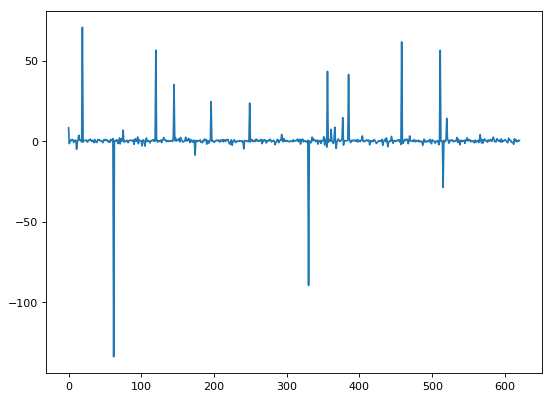

In [17]:
predicted_result= np.loadtxt("./prediction_result.csv", delimiter=" ",skiprows=0, dtype=np.float32)
print('shape of predicted result:',predicted_result.shape)
test_gt= test_data[:,-1]
figure=plt.figure(figsize=(8, 6), dpi=80)
plt.plot((test_gt-predicted_result)*100/test_gt)
gt_predicted= np.concatenate((test_gt.reshape(-1,1),predicted_result.reshape(-1,1)),axis=1)
print(gt_predicted.shape)
np.savetxt("./gt_pred.txt", gt_predicted ,delimiter=" ")
loaded_gt_pred= np.loadtxt("./gt_pred.txt", delimiter=" ",skiprows=0, dtype=np.float32)
print(gt_predicted.shape)

# Random forest

In [20]:
from sklearn.ensemble import RandomForestRegressor
train_X, train_y = train_data[:,:-1],train_data[:,-1]
test_X, test_y = test_data[:,:-1],test_data[:,-1]
print(train_X, train_y)
regr = RandomForestRegressor(random_state=0)

regr.fit(train_X, train_y)
pred_y=regr.predict(test_X)
print('pred_y :',pred_y.shape,'test_y:',test_y.shape)

copied_test_data=np.copy(test_data)
labeled_data= label_data(copied_test_data,pred_y)
print('accuracy estimation:',accuracy_estim(labeled_data))

copied_test_data=np.copy(test_data)
calc_residual(test_y,pred_y)
calc_deviation(test_y,pred_y)

[[ 0.26        0.69689757  2.         51.32946   ]
 [ 0.5         1.1038107   1.6        15.0969    ]
 [ 0.08        0.46149614  1.6        48.31008   ]
 ...
 [ 0.42        0.75116843  3.6         3.01938   ]
 [ 0.39        0.8934847   1.2         9.05814   ]
 [ 0.41        0.8388722   1.2        21.13566   ]] [150.15158   36.279015 286.4871   ...   6.592417  21.815022  43.81301 ]
pred_y : (3131,) test_y: (3131,)
outlier is: 164
accuracy estimation: 0.9476205685084638
residual is: (3131,) sum residual is: 0.13776026336779673
variance is: 19990.831459367895
std is: 141.38893683512828


141.38893683512828

In [21]:
from sklearn.ensemble import RandomForestRegressor
train_X, train_y = train_data[:,:-1],train_data[:,-1]
test_X, test_y = test_data[:,:-1],test_data[:,-1]
print(train_X, train_y)
regr = RandomForestRegressor(n_estimators=60,max_depth=60)

regr.fit(train_X, train_y)
pred_y=regr.predict(test_X)
print('pred_y :',pred_y.shape,'test_y:',test_y.shape)
copied_test_data=np.copy(test_data)
labeled_data= label_data(copied_test_data,pred_y)
print('accuracy estimation:',accuracy_estim(labeled_data))

[[ 0.26        0.69689757  2.         51.32946   ]
 [ 0.5         1.1038107   1.6        15.0969    ]
 [ 0.08        0.46149614  1.6        48.31008   ]
 ...
 [ 0.42        0.75116843  3.6         3.01938   ]
 [ 0.39        0.8934847   1.2         9.05814   ]
 [ 0.41        0.8388722   1.2        21.13566   ]] [150.15158   36.279015 286.4871   ...   6.592417  21.815022  43.81301 ]
pred_y : (3131,) test_y: (3131,)
outlier is: 157
accuracy estimation: 0.9498562759501756


# XGBoost

In [17]:
from sklearn import ensemble
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error

regr = ensemble.GradientBoostingRegressor()

regr.fit(train_X, train_y)
pred_y=regr.predict(test_X)
print('pred_y :',pred_y,'test_y:',test_y)
copied_test_data=np.copy(test_data)
labeled_data= label_data(copied_test_data,pred_y)
print('accuracy estimation:',accuracy_estim(labeled_data))
calc_residual(test_y,pred_y)
calc_deviation(test_y,pred_y)

pred_y : [506.19382557 280.90176384 320.18971819 ... 350.46454129 916.34952209
  79.07752811] test_y: [188.67332   70.29463   71.55759  ... 212.18944  739.9296   108.803375]
outlier is: 1657
accuracy estimation: 0.47077610986905144
residual is: (3131,) sum residual is: 0.21239945123194434
variance is: 17640.456495174367
std is: 132.81738024511088


132.81738024511088

In [11]:
from sklearn import ensemble
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error

regr = ensemble.GradientBoostingRegressor(learning_rate=0.3,n_estimators=50)

regr.fit(train_X, train_y)
pred_y=regr.predict(test_X)
print('pred_y :',pred_y,'test_y:',test_y)
copied_test_data=np.copy(test_data)
labeled_data= label_data(copied_test_data,pred_y)
print('accuracy estimation:',accuracy_estim(labeled_data))

pred_y : [420.73615003 178.63422142 209.39350642 ... 382.05147255 888.22644562
  73.19304919] test_y: [188.67332   70.29463   71.55759  ... 212.18944  739.9296   108.803375]
accuracy estimation: 0.42797828169913765


# GP regressor

In [13]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel

kernel = DotProduct() + WhiteKernel()
gpr = GaussianProcessRegressor(kernel=kernel,random_state=0).fit(train_X, train_y)

pred_y=gpr.predict(test_X, return_std=False)

In [14]:
copied_test_data=np.copy(test_data)
labeled_data= label_data(copied_test_data,pred_y)
print('accuracy estimation:',accuracy_estim(labeled_data))

accuracy estimation: 0.029666666666666668


In [8]:
print('pred_y :',pred_y,'test_y:',test_y)

pred_y : [427.82035309 348.44164534 394.17641655 ... 425.35305756 763.46434122
 -33.2065582 ] test_y: [188.67332   70.29463   71.55759  ... 212.18944  739.9296   108.803375]
